In [1]:
import torch
from d2l import torch as d2l
from torch import nn
import torchvision

In [2]:
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5,), (0.5,))
])

In [3]:
train_data = torchvision.datasets.MNIST('./data/',train = True,transform = transform,download = True)
test_data = torchvision.datasets.MNIST('./data/',train = False,transform = transform,download = True)

In [4]:
batch_size = 128
train_iter = torch.utils.data.DataLoader(dataset = train_data,batch_size = batch_size,shuffle = True,num_workers=4)
test_iter = torch.utils.data.DataLoader(dataset = test_data,batch_size = batch_size,shuffle=False,num_workers=4)

In [5]:
net = nn.Sequential(
    nn.Conv2d(1, 6, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(6, 16, kernel_size=5), nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Flatten(),
    nn.Linear(16 * 5 * 5, 120), nn.ReLU(),
    nn.Linear(120, 84), nn.ReLU(),
    nn.Linear(84, 10))

loss 0.064, train acc 0.980, test acc 0.981
35688.5 examples/sec on cuda:0


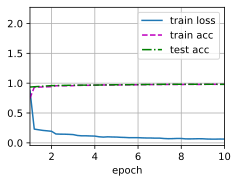

In [6]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

In [7]:
def get_labels(labels):
    text_labels = ['0','1','2','3','4','5','6','7','8','9']
    return [text_labels[int(i)] for i in labels]

array([<Axes: title={'center': '7\n7'}>, <Axes: title={'center': '2\n2'}>,
       <Axes: title={'center': '1\n1'}>, <Axes: title={'center': '0\n0'}>,
       <Axes: title={'center': '4\n4'}>, <Axes: title={'center': '1\n1'}>,
       <Axes: title={'center': '4\n4'}>, <Axes: title={'center': '9\n9'}>,
       <Axes: title={'center': '5\n5'}>, <Axes: title={'center': '9\n9'}>,
       <Axes: title={'center': '0\n0'}>, <Axes: title={'center': '6\n6'}>,
       <Axes: title={'center': '9\n9'}>, <Axes: title={'center': '0\n0'}>,
       <Axes: title={'center': '1\n1'}>, <Axes: title={'center': '5\n5'}>,
       <Axes: title={'center': '9\n9'}>, <Axes: title={'center': '7\n7'}>],
      dtype=object)

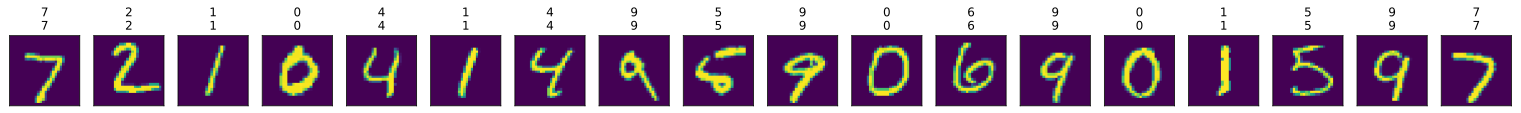

In [8]:
n = 18
dataiter = iter(test_iter)
images, labels = next(dataiter)
images, labels = images.to(d2l.try_gpu()), labels.to(d2l.try_gpu())
trues = get_labels(labels)
preds = get_labels(net(images).argmax(axis=1))
images = images.cpu().numpy()
titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
d2l.show_images(images[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])